In [2]:
%load_ext autoreload
%autoreload 2

#Setting Up and Importing the Necessary Packages/Libraries
##Package for reading in Bruker OPUS type files
from brukeropusreader import read_file
import matplotlib.pyplot as plt
import pathlib
import numpy as np
#Local Functions
from hydrogenase_processing.vaporfit import atm_subtraction, AtmFitParams
from hydrogenase_processing.remove_wv import subtract_wv
from hydrogenase_processing.cut_range import cut_range_subtraction

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
#Paths to Local Data
path_to_hyd2_dark_titration_raw_data = pathlib.Path("../data/opus_files/hyd2_dark_titration_examples")
path_to_high_low_subwv_data = pathlib.Path("../data/opus_files/high_n_low_subwv") 
path_to_water_vapor_data = pathlib.Path("../data/opus_files/water_vapor")
path_to_output_plots_= pathlib.Path("../data/output_plots/")


In [259]:
#Showing proof of concept for cutting the range to match the number of readings between the raw spectra and the water vapor
#Reading in hydrogenase reaction and reference water vapor spectrums
opus_data_to_cut = read_file(f'{path_to_hyd2_dark_titration_raw_data}''/011a as iso Hyd2 dark titration 0 mV.0022')
wv_data = read_file(f'{path_to_water_vapor_data}''/water vapor 4cm-1.1')

In [226]:
print(opus_data_to_cut["AB"].size)
print(wv_data["AB"].size)

ab_x = opus_data_to_cut.get_range("AB")
wv_x = wv_data.get_range("AB")

1816
1556


In [227]:
whole_num_ab_x = np.round(ab_x, 0)
print(whole_num_ab_x)
type(whole_num_ab_x)
ind_1800 = np.where(np.logical_and(whole_num_ab_x >= 1798, whole_num_ab_x < 1801))
ind_2150 = np.where(whole_num_ab_x == 2149)
print(ind_1800,ind_2150)

type(ind_1800[0][0])

[3998. 3996. 3994. ...  503.  501.  499.]
(array([1141]),) (array([959]),)


numpy.int64

In [228]:
raw_wavenb_cut = ab_x[959:1142]
raw_ab_cut = opus_data_to_cut["AB"][959:1142]
wv_wavenb_cut = wv_x[959:1142]
wv_ab_cut = wv_data["AB"][959:1142]



len(raw_wavenb_cut)
len(raw_ab_cut)
len(wv_ab_cut)

183

In [229]:
cut_range_wv_sub = atm_subtraction(raw_wavenb_cut, raw_ab_cut, wv_ab_cut)

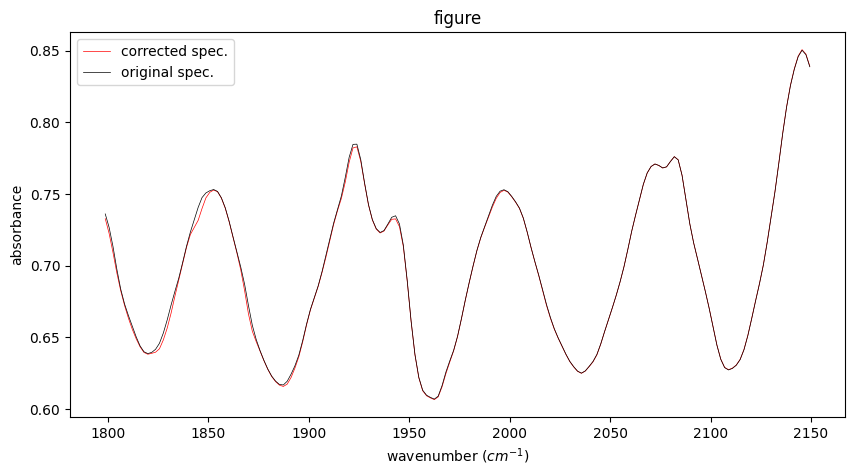

In [230]:
cut_range_wv_sub[0][0].sub_spectrum.size
cut_range_wv_sub[1] == cut_range_wv_sub[0][0].sub_spectrum

cut_range_wv_sub[0][0].plot()

In [4]:
cut_range_wv_sub[0][0].fit_atm_params[0]

NameError: name 'cut_range_wv_sub' is not defined

959
1141


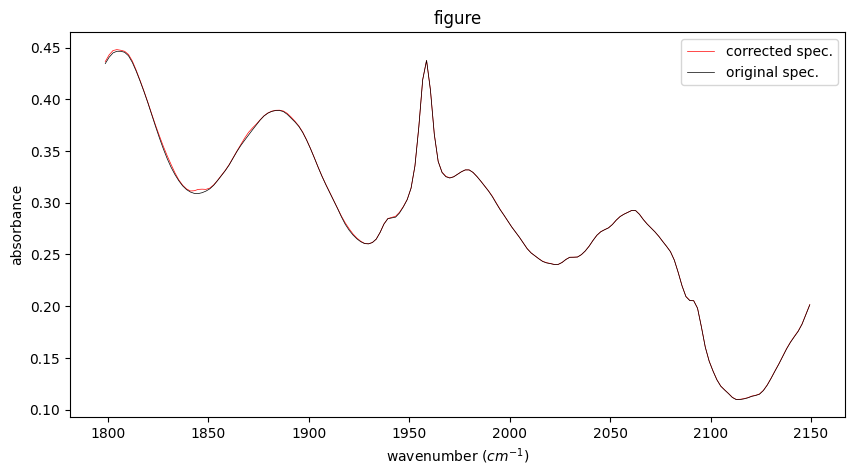

In [261]:
#Testing cut_range function

cut_range_func_wv_sub = cut_range_subtraction(opus_data_to_cut, wv_data, 2150, 1800)


#print(cut_raw_and_wv[0:4])

cut_range_func_wv_sub[0][0].plot()


In [3]:
subtraction_parameters = cut_range_func_wv_sub[0][0].fit_atm_params

print(subtraction_parameters)

NameError: name 'cut_range_func_wv_sub' is not defined